In [288]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [194]:
df_tsunami=pd.read_csv("Aziz/waves.csv").drop_duplicates()

In [3]:
df_quake=pd.read_csv("database.csv")

In [232]:
data_tsunami=df[df_tsunami['YEAR']>1964]

In [4]:
df_tsunami.columns

Index(['SOURCE_ID', 'WAVE_ID', 'YEAR', 'MONTH', 'DAY', 'REGION_CODE',
       'COUNTRY', 'STATE/PROVINCE', 'LOCATION', 'LATITUDE', 'LONGITUDE',
       'DISTANCE_FROM_SOURCE', 'TRAVEL_TIME_HOURS', 'TRAVEL_TIME_MINUTES',
       'VALIDITY', 'MEASUREMENT_TYPE', 'PERIOD', 'FIRST_MOTION',
       'MAXIMUM_HEIGHT', 'HORIZONTAL_INUNDATION', 'INJURIES',
       'INJURY_ESTIMATE', 'FATALITIES', 'FATALITY_ESTIMATE',
       'DAMAGE_MILLIONS_DOLLARS', 'DAMAGE_ESTIMATE', 'HOUSES_DAMAGED',
       'HOUSE_DAMAGE_ESTIMATE', 'HOUSES_DESTROYED',
       'HOUSE_DESTRUCTION_ESTIMATE'],
      dtype='object')

In [5]:
df_quake.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [6]:
df_quake

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.4050,166.6290,Earthquake,35.00,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,01/12/1965,13:32:25,27.3570,87.8670,Earthquake,20.00,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.3090,166.2120,Earthquake,35.00,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.4520,-27.0430,Earthquake,95.00,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.5630,178.4870,Earthquake,565.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


In [234]:
df_tsunami

,SOURCE_ID,WAVE_ID,YEAR,MONTH,DAY,REGION_CODE,COUNTRY,STATE/PROVINCE,LOCATION,LATITUDE,...,INJURIES,INJURY_ESTIMATE,FATALITIES,FATALITY_ESTIMATE,DAMAGE_MILLIONS_DOLLARS,DAMAGE_ESTIMATE,HOUSES_DAMAGED,HOUSE_DAMAGE_ESTIMATE,HOUSES_DESTROYED,HOUSE_DESTRUCTION_ESTIMATE
0,1,11014,-2000,NaN,NaN,50.0,SYRIA,NaN,UGARIT,35.583000,...,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN
1,3,17601,-1610,NaN,NaN,50.0,SYRIA,NaN,UGARIT,35.583000,...,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN
2,3,1,-1610,NaN,NaN,50.0,GREECE,NaN,N. AND E. COAST CRETE,35.500000,...,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN
3,9,2,-479,NaN,NaN,50.0,GREECE,NaN,"POTIDAEA, MACEDONIA",40.300000,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,10,19364,-426,6.0,NaN,50.0,GREECE,NaN,TARFI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10,19365,-426,6.0,NaN,50.0,GREECE,NaN,THERMOPLYLES,38.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10,5,-426,6.0,NaN,50.0,GREECE,NaN,DAPHNUS,38.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10,6,-426,6.0,NaN,50.0,GREECE,NaN,SKOPELOS,39.120000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10,3,-426,6.0,NaN,50.0,GREECE,NaN,ATALANTI,38.651000,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
9,10,17612,-426,6.0,NaN,50.0,GREECE,NaN,THRONIUM,38.817000,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [7]:
df_quake.isna().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [233]:
df_tsunami.isna().sum()

SOURCE_ID                         0
WAVE_ID                           0
YEAR                              0
MONTH                           104
DAY                             213
REGION_CODE                       1
COUNTRY                           3
STATE/PROVINCE                 5197
LOCATION                          5
LATITUDE                        612
LONGITUDE                       612
DISTANCE_FROM_SOURCE            883
TRAVEL_TIME_HOURS             22931
TRAVEL_TIME_MINUTES           22956
VALIDITY                      25876
MEASUREMENT_TYPE                289
PERIOD                        23977
FIRST_MOTION                  24652
MAXIMUM_HEIGHT                 3874
HORIZONTAL_INUNDATION         17412
INJURIES                      26080
INJURY_ESTIMATE               26074
FATALITIES                    25520
FATALITY_ESTIMATE             25299
DAMAGE_MILLIONS_DOLLARS       26068
DAMAGE_ESTIMATE               24316
HOUSES_DAMAGED                26041
HOUSE_DAMAGE_ESTIMATE       

In [8]:
df_quake['Type'].value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

# I-Data Preprocessing

### I-1 Selecting the 1965-216 tsunami's date

In [235]:
df=df_tsunami[df_tsunami['YEAR']<2017]
data_tsunami=df_tsunami[df_tsunami['YEAR']>1964]

### I-2 Selecting the important features

In [9]:
data_quake=df_quake[["Date","Time","Latitude",'Longitude','Depth','Magnitude']]

In [10]:
data_quake.isna().sum()

Date         0
Time         0
Latitude     0
Longitude    0
Depth        0
Magnitude    0
dtype: int64

### I- 3 Transforming the date and time to a standard feature

#### Earthquak

In [11]:
import datetime
import time

In [12]:
timestamp = []
epoch = datetime.datetime(1970,1,1,0,0,0)
for d, t in zip(data_quake['Date'], data_quake['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        timestamp.append('ValueError')
    except OverflowError:
        diff=ts-epoch
        timestamp.append(float(diff.days * 24 * 3600 + diff.seconds)-3600)

In [13]:
data_quake['timeStamp']=pd.Series(timestamp)

In [14]:
data_quake.isna().sum()

Date         0
Time         0
Latitude     0
Longitude    0
Depth        0
Magnitude    0
timeStamp    0
dtype: int64

In [15]:
final_quake=data_quake.drop(['Date','Time'],axis=1)

In [16]:
final_quake = final_quake[final_quake.timeStamp != 'ValueError']

In [32]:
final_quake=final_quake.dropna()

In [17]:
final_quake.isna().sum()

Latitude     0
Longitude    0
Depth        0
Magnitude    0
timeStamp    0
dtype: int64

In [25]:
tsfloat=[]
for i in final_quake['timeStamp']:
    tsfloat.append(float(i))
final_quake['timeStamp']=pd.Series(tsfloat)

In [33]:
final_quake.isna().sum()

Latitude     0
Longitude    0
Depth        0
Magnitude    0
timeStamp    0
dtype: int64

In [19]:
data_quake.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,timeStamp
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0,-1.57634e+08
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8,-1.57469e+08
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2,-1.57359e+08
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8,-1.57097e+08
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8,-1.5703e+08


In [20]:
final_quake.head()

,Latitude,Longitude,Depth,Magnitude,timeStamp
0,19.246,145.616,131.6,6.0,-1.57634e+08
1,1.863,127.352,80.0,5.8,-1.57469e+08
2,-20.579,-173.972,20.0,6.2,-1.57359e+08
3,-59.076,-23.557,15.0,5.8,-1.57097e+08
4,11.938,126.427,15.0,5.8,-1.5703e+08


##### Adding a year column

In [97]:
year=[]
for ch in data_quake['Date']:
    year.append(ch[-4:])
final_quake['Year']=pd.Series(year)

In [99]:
final_quake.head()

,Latitude,Longitude,Depth,Magnitude,timeStamp,Year
0,19.246,145.616,131.6,6.0,-157634142.0,1965
1,1.863,127.352,80.0,5.8,-157469411.0,1965
2,-20.579,-173.972,20.0,6.2,-157359242.0,1965
3,-59.076,-23.557,15.0,5.8,-157097417.0,1965
4,11.938,126.427,15.0,5.8,-157030030.0,1965


In [102]:
tsfloat=[]
for i in final_quake['Year']:
    tsfloat.append(float(i))
final_quake['Year']=pd.Series(tsfloat)

In [134]:
final_quake=final_quake.dropna()

##### Tsunami

In [273]:
data_tsunami.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16805 entries, 9398 to 26202
Data columns (total 31 columns):
SOURCE_ID                     16805 non-null int64
WAVE_ID                       16805 non-null int64
YEAR                          16805 non-null int64
MONTH                         16805 non-null float64
DAY                           16805 non-null float64
REGION_CODE                   16805 non-null float64
COUNTRY                       16805 non-null object
STATE/PROVINCE                13778 non-null object
LOCATION                      16803 non-null object
LATITUDE                      16681 non-null float64
LONGITUDE                     16681 non-null float64
DISTANCE_FROM_SOURCE          16615 non-null float64
TRAVEL_TIME_HOURS             1981 non-null float64
TRAVEL_TIME_MINUTES           1996 non-null float64
VALIDITY                      102 non-null object
MEASUREMENT_TYPE              16662 non-null float64
PERIOD                        1206 non-null float64
FI

In [240]:
data_tsunami["MONTH"]=data_tsunami["MONTH"].fillna(data_tsunami["MONTH"].mean())

In [241]:
data_tsunami["DAY"]=data_tsunami["DAY"].fillna(data_tsunami["DAY"].mean())

In [250]:
timestamp = []
epoch = datetime.datetime(1970,1,1,0,0,0)
for y,m,d in zip(data_tsunami['YEAR'],data_tsunami['MONTH'],data_tsunami['DAY']):
    try:
        ts = datetime.datetime.strptime(str(int(m))+'/'+str(int(d))+'/'+str(int(y)), '%m/%d/%Y')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        print("problem")
        timestamp.append('ValueError')
    except OverflowError:
        diff=ts-epoch
        timestamp.append(float(diff.days * 24 * 3600 + diff.seconds)-3600)

In [249]:
data_tsunami['timeStamp']=timestamp

In [251]:
data_tsunami

,SOURCE_ID,WAVE_ID,YEAR,MONTH,DAY,REGION_CODE,COUNTRY,STATE/PROVINCE,LOCATION,LATITUDE,...,INJURY_ESTIMATE,FATALITIES,FATALITY_ESTIMATE,DAMAGE_MILLIONS_DOLLARS,DAMAGE_ESTIMATE,HOUSES_DAMAGED,HOUSE_DAMAGE_ESTIMATE,HOUSES_DESTROYED,HOUSE_DESTRUCTION_ESTIMATE,timeStamp
9398,1963,4672,1965,1.0,24.0,83.0,INDONESIA,NORTH MALUKU,"SANANA, SANANA ISLAND",-2.067000,...,NaN,71.0,2.0,NaN,2.0,NaN,NaN,NaN,2.0,-1.557828e+08
9399,1963,4670,1965,1.0,24.0,81.0,USA TERRITORY,AS,"PAGO PAGO, AMERICAN SAMOA",-14.276600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.557828e+08
9400,1963,4671,1965,1.0,24.0,83.0,INDONESIA,MALUKU,"NAMLEA, BURU ISLAND",-3.300000,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-1.557828e+08
9401,1963,29547,1965,1.0,24.0,83.0,INDONESIA,NORTH MALUKU,MANGOLE ISLAND,-1.800000,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,-1.557828e+08
9402,1964,13681,1965,2.0,4.0,85.0,JAPAN,KOCHI,TOSA-SHIMIZU,32.779200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.548324e+08
9403,1964,13683,1965,2.0,4.0,85.0,JAPAN,MIE,OWASE,34.083000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.548324e+08
9404,1964,13684,1965,2.0,4.0,85.0,JAPAN,MIYAGI,AYUKAWA,38.300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.548324e+08
9405,1964,13685,1965,2.0,4.0,85.0,JAPAN,MIYAZAKI,ABURATSU,31.583000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.548324e+08
9406,1964,10208,1965,2.0,4.0,87.0,USA,AK,"SITKA, AK",57.052000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.548324e+08
9407,1964,13668,1965,2.0,4.0,85.0,JAPAN,HOKKAIDO,KUSHIRO,42.975600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.548324e+08


In [258]:
data_tsunami['MAXIMUM_HEIGHT']=data_tsunami['MAXIMUM_HEIGHT'].fillna(data_tsunami['MAXIMUM_HEIGHT'].mean())

In [278]:
# % of null values for the column LATITUDE
print('% null lat: ',data_tsunami['LATITUDE'].isna().sum()/len(data_tsunami['LATITUDE'])*100)
print('% null Long: ',data_tsunami['LONGITUDE'].isna().sum()/len(data_tsunami['LONGITUDE'])*100)

% null lat:  0.7378756322523059
% null Long:  0.7378756322523059


In [279]:
#We can drop the null rows
data_tsunami = data_tsunami.dropna(axis=0, subset=['LATITUDE'])

In [280]:
data_tsunami.isna().sum()

SOURCE_ID                         0
WAVE_ID                           0
YEAR                              0
MONTH                             0
DAY                               0
REGION_CODE                       0
COUNTRY                           0
STATE/PROVINCE                 2960
LOCATION                          1
LATITUDE                          0
LONGITUDE                         0
DISTANCE_FROM_SOURCE             66
TRAVEL_TIME_HOURS             14702
TRAVEL_TIME_MINUTES           14687
VALIDITY                      16579
MEASUREMENT_TYPE                132
PERIOD                        15476
FIRST_MOTION                  15820
MAXIMUM_HEIGHT                    0
HORIZONTAL_INUNDATION          8172
INJURIES                      16621
INJURY_ESTIMATE               16619
FATALITIES                    16455
FATALITY_ESTIMATE             16443
DAMAGE_MILLIONS_DOLLARS       16653
DAMAGE_ESTIMATE               16248
HOUSES_DAMAGED                16617
HOUSE_DAMAGE_ESTIMATE       

# II- MAP Visualization / Tsunamis & Earthquakes Relation

## II-1 Map / Geographical Correlation

In [308]:
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
import matplotlib.cm as cm

In [255]:
lons=final_quake['Longitude']
lats=final_quake['Latitude']

In [281]:
tsunami_lons=data_tsunami['LONGITUDE']
tsunami_lats=data_tsunami['LATITUDE']

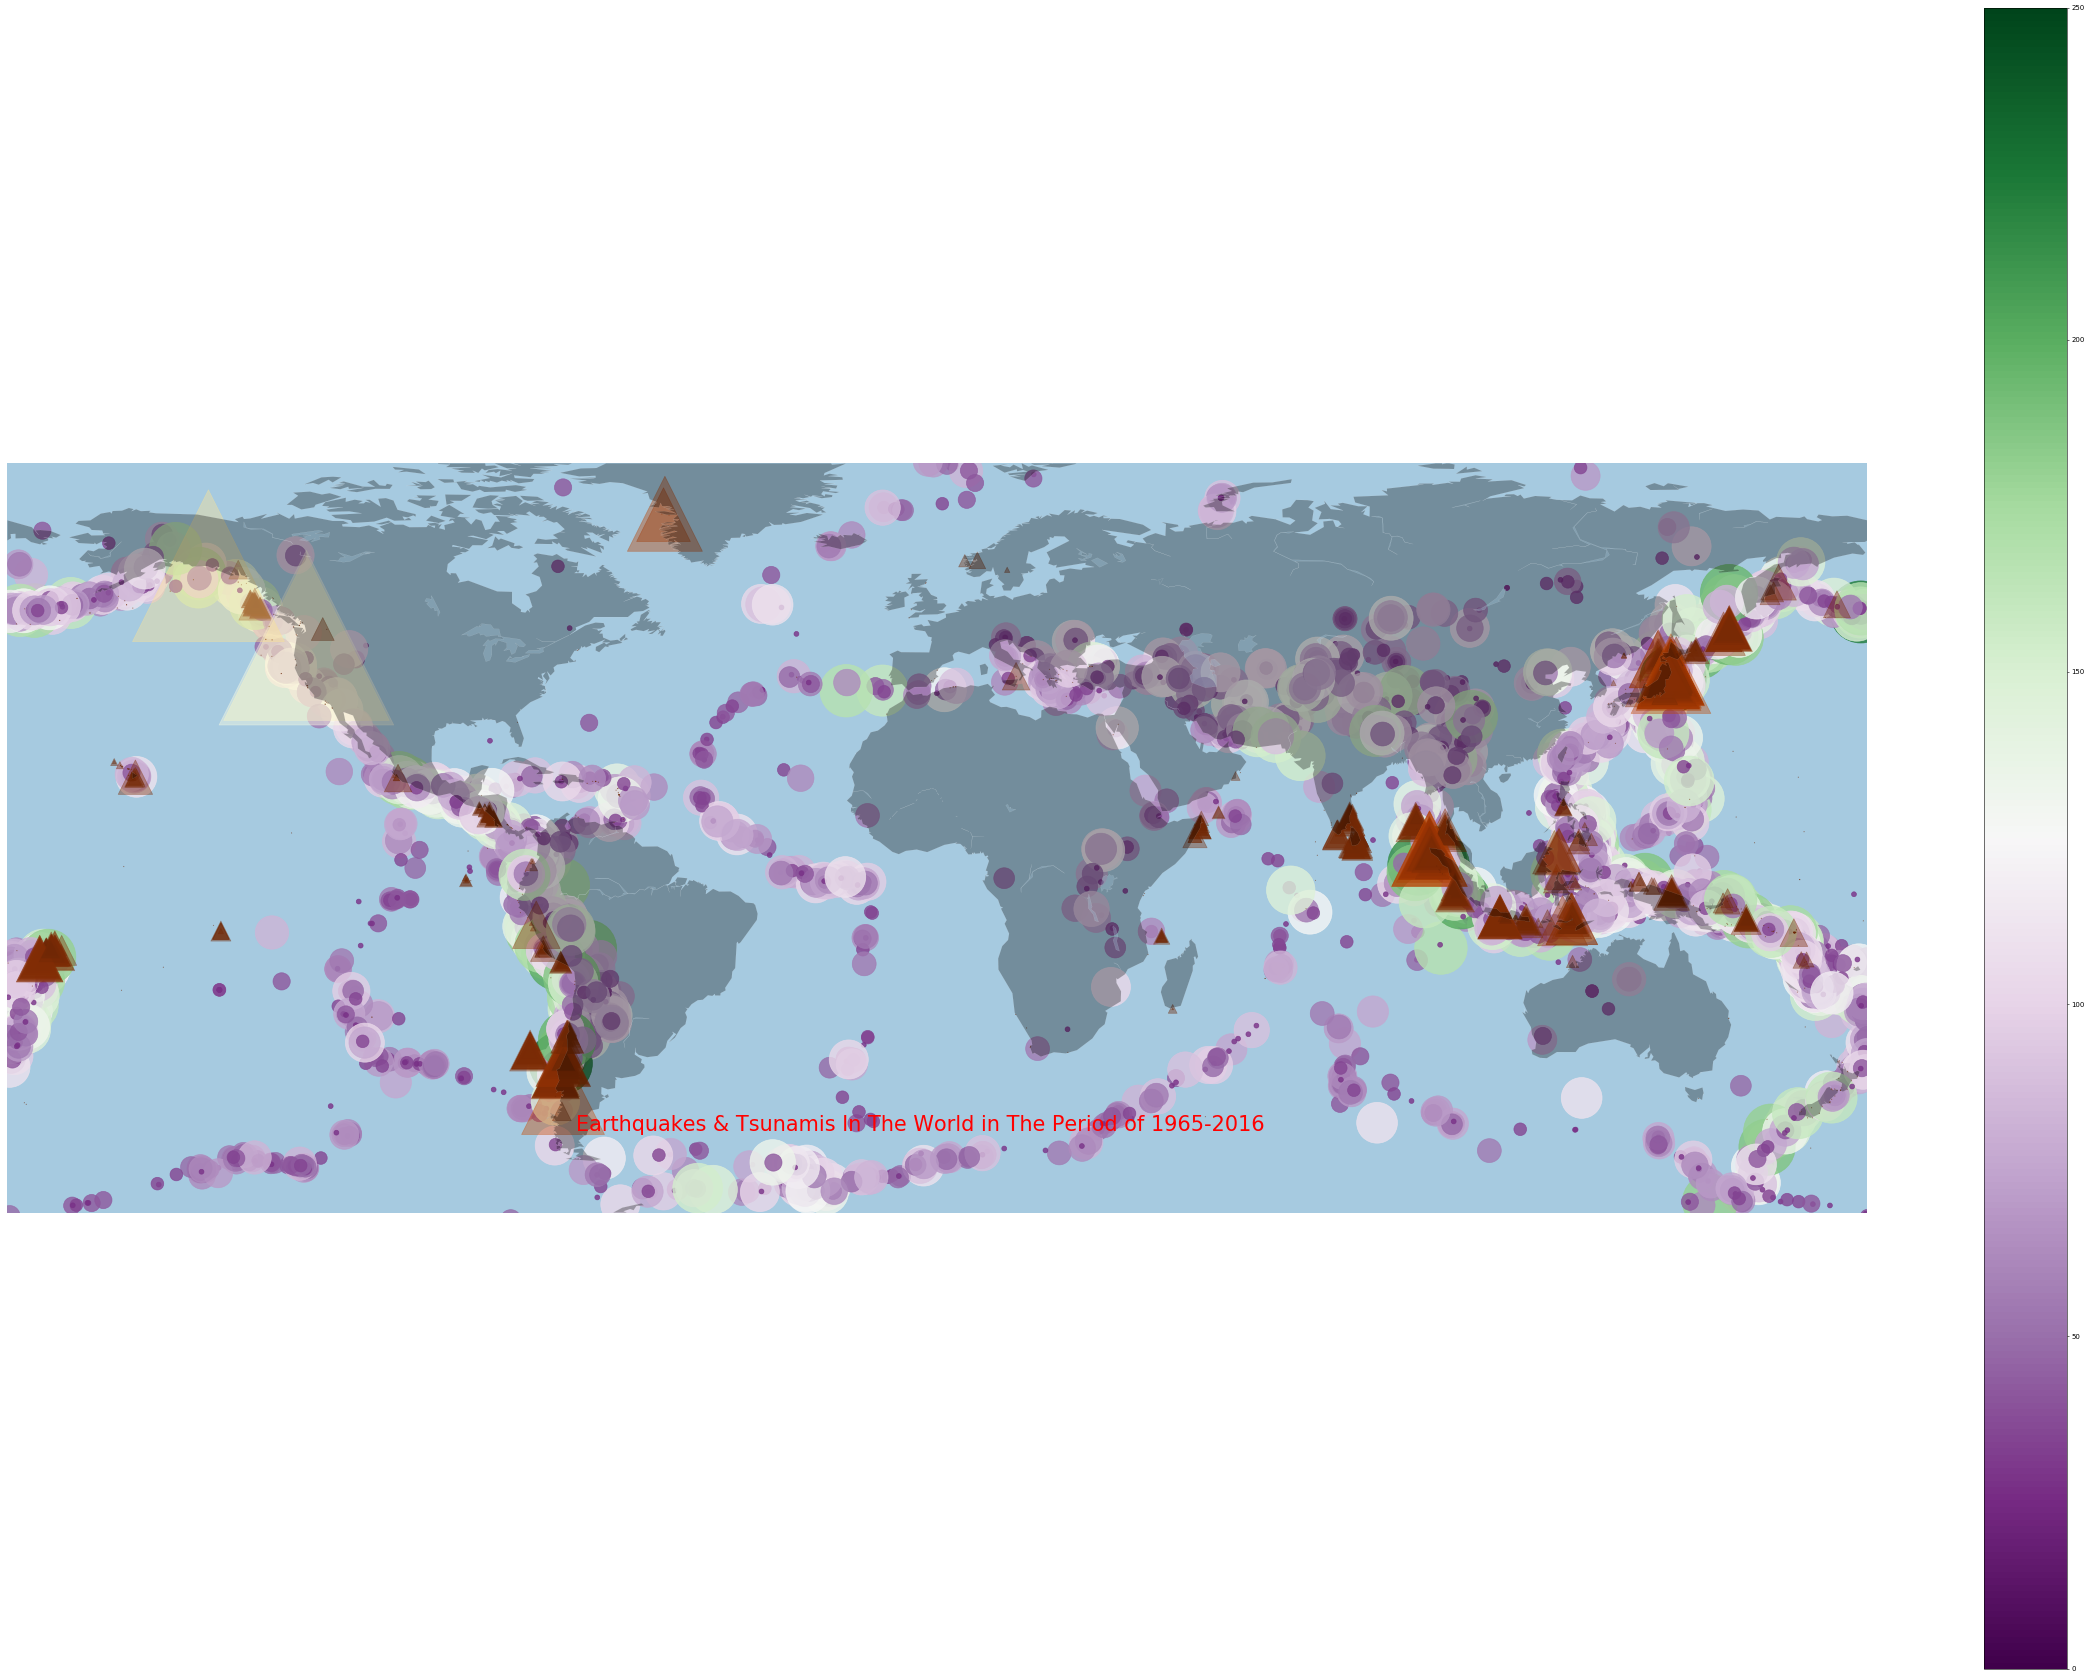

In [313]:
scaler=StandardScaler()
tsunami_metric=scaler.fit_transform(data_tsunami[['MAXIMUM_HEIGHT']].values)
quake_metric=scaler.fit_transform(final_quake[['Magnitude']].values)

my_dpi=50
plt.figure(figsize=(3000/my_dpi, 2200/my_dpi), dpi=my_dpi)
  
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='black', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
  
# Add a point per position
m.scatter( lons,lats, s=quake_metric*1200,c=final_quake['Magnitude']*2, alpha=0.8, cmap="PRGn",marker="o")

m.scatter( tsunami_lons,tsunami_lats, s=tsunami_metric*1700,c=data_tsunami['MAXIMUM_HEIGHT'], alpha=0.4, cmap="YlOrBr_r",marker="^")

vmin = min(data_tsunami['MAXIMUM_HEIGHT'])
vmax = max(data_tsunami['MAXIMUM_HEIGHT'])
norm = colors.Normalize(vmin=vmin, vmax=vmax)

plt.colorbar(cm.ScalarMappable(norm=norm, cmap='PRGn'))

plt.text(-70,-50,'Earthquakes & Tsunamis In The World in The Period of 1965-2016', ha='left', va='bottom', size=30, color='#ff0000' )
plt.savefig('World Earthquakes 1965-2016.png', bbox_inches='tight')
plt.show()

##### As we can see in the previous map the zones wich are affected by Earthquakes are generally affected by Tsunamis as well
##### This shows that there is somehow a big correlation between Tsunamis and Earthquakes 

## II-2 Scatter Plot / Temporal Correlation

Text(0.5, 1.0, 'Tsunamis through Years')

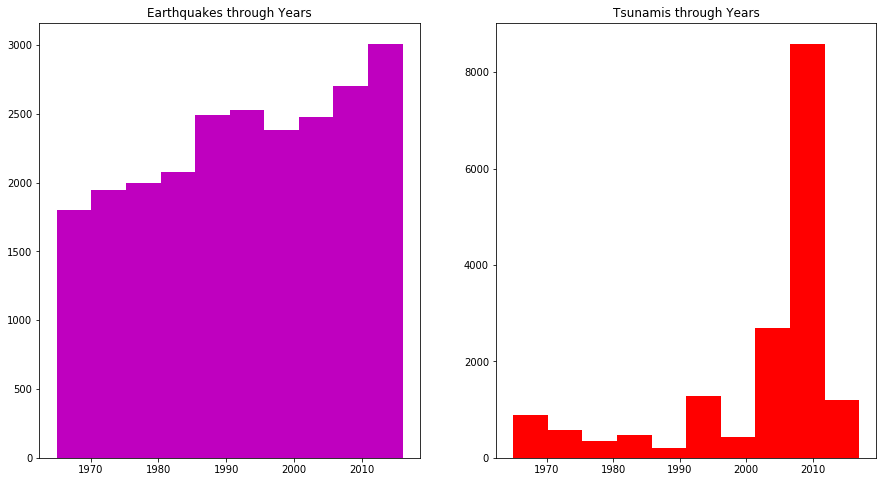

In [363]:
fig, axarr = plt.subplots(1, 2, figsize=(15, 8))
axarr[0].hist(final_quake['Year'],color='m')
axarr[0].set_title('Earthquakes through Years')
axarr[1].hist(data_tsunami['YEAR'],color='r' )
axarr[1].set_title('Tsunamis through Years')

# III- Data Visualization of The Earthquake's Data 

In [24]:
final_quake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23409 entries, 0 to 23411
Data columns (total 5 columns):
Latitude     23409 non-null float64
Longitude    23409 non-null float64
Depth        23409 non-null float64
Magnitude    23409 non-null float64
timeStamp    23409 non-null object
dtypes: float64(4), object(1)
memory usage: 1.1+ MB


In [36]:
final_quake.describe()

,Latitude,Longitude,Depth,Magnitude,timeStamp
count,23406.000000,23406.000000,23406.000000,23406.000000,2.340600e+04
mean,1.676189,39.624695,70.753281,5.882556,7.300448e+08
std,30.113441,125.518369,122.612348,0.423095,4.552845e+08
min,-77.080000,-179.997000,-1.100000,5.500000,-1.576341e+08
25%,-18.655000,-76.352000,14.532500,5.600000,3.558524e+08
50%,-3.569500,103.970000,33.000000,5.700000,7.546963e+08
75%,26.177500,145.030750,54.000000,6.000000,1.126284e+09
max,86.005000,179.998000,700.000000,9.100000,1.483125e+09


## Some Boxplot

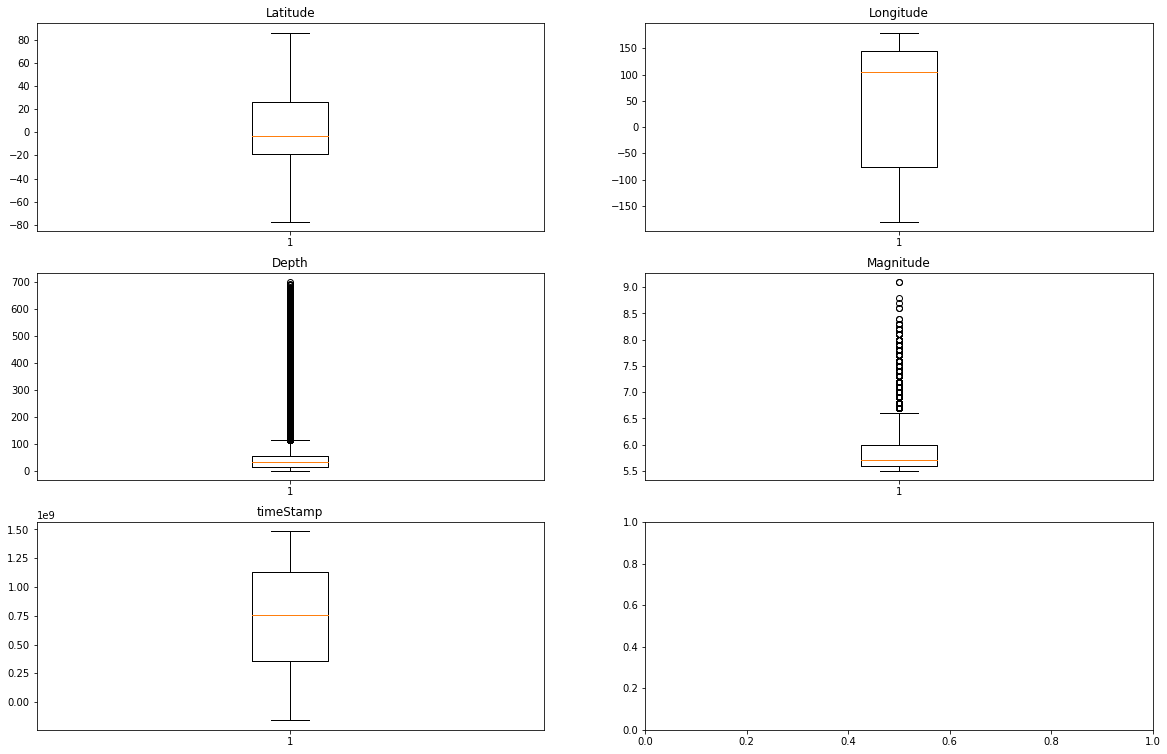

In [53]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 13))
for i,x in enumerate(final_quake):
    axarr[i//2][i%2].boxplot(final_quake[x])
    axarr[i//2][i%2].set_title(x)

Text(0.5, 1.0, 'Magnitude')

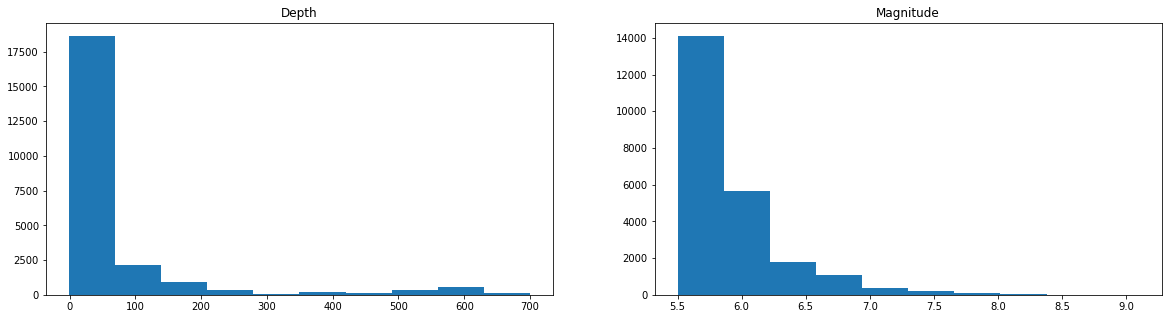

In [63]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
axarr[0].hist(final_quake['Depth'])
axarr[0].set_title('Depth')
axarr[1].hist(final_quake['Magnitude'])
axarr[1].set_title('Magnitude')

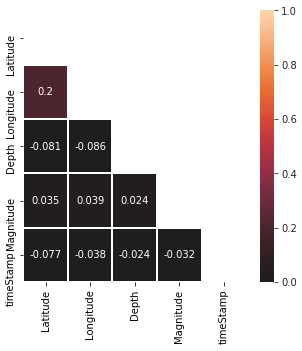

In [66]:
corr_matrix=final_quake.corr()
fig, ax = plt.subplots(figsize=(5,5))
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    p2 = sns.heatmap(corr_matrix,fmt=".2g",annot=True,linewidths=1,cbar=True,vmin=0,ax=ax, vmax=1,center=0,mask=mask)

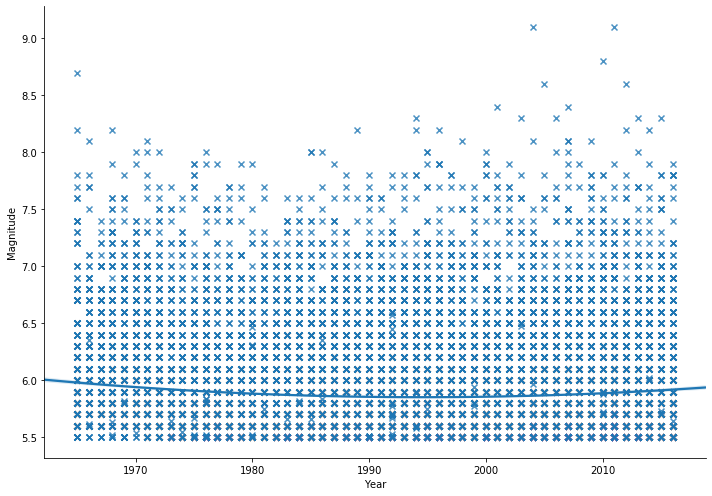

In [108]:
cb=sns.lmplot(data=final_quake,x="Year",y="Magnitude",size=7,aspect=10/7,markers="x",order=2,palette="Set1")
cb

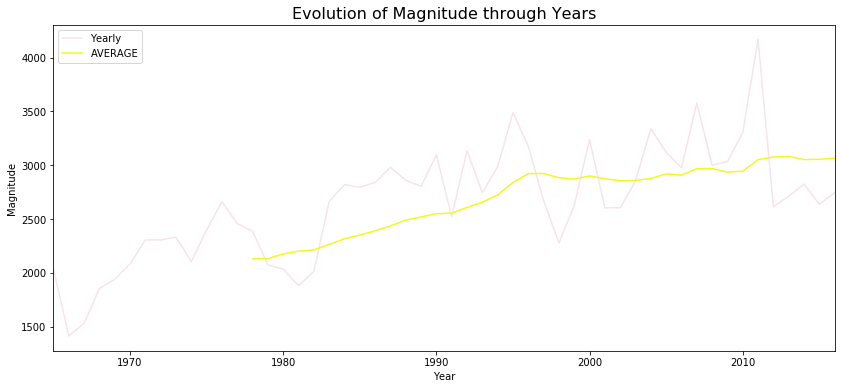

In [115]:
plt.figure(figsize=(14,6))
cmap = plt.cm.plasma
final_quake.groupby('Year')['Magnitude'].sum().plot(alpha=0.15, color=cmap(0.5))
final_quake.groupby('Year')['Magnitude'].sum().rolling(window=14).mean().plot(color=cmap(2.3))
plt.ylabel('Magnitude')
plt.title('Evolution of Magnitude through Years', fontsize=16)
plt.legend(['Yearly','AVERAGE'])
plt.show()

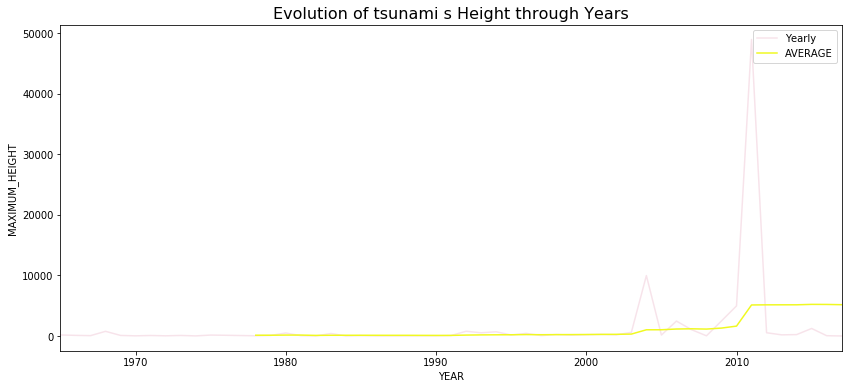

In [359]:
plt.figure(figsize=(14,6))
cmap = plt.cm.plasma
data_tsunami.groupby('YEAR')['MAXIMUM_HEIGHT'].sum().plot(alpha=0.15, color=cmap(0.5))
data_tsunami.groupby('YEAR')['MAXIMUM_HEIGHT'].sum().rolling(window=14).mean().plot(color=cmap(2.3))
plt.ylabel('MAXIMUM_HEIGHT')
plt.title('Evolution of tsunami s Height through Years', fontsize=16)
plt.legend(['Yearly','AVERAGE'])
plt.show()

# IV- Regression

## IV.1-  Multi Linear Regression

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [75]:
x=final_quake.drop(['Depth','Magnitude'],axis=1)
y=final_quake[["Magnitude",'Depth']]
X_train,X_test,Y_train,Y_test=train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)
lg=LinearRegression()
lg.fit(X_train,Y_train)
predicted=lg.predict(X_test)
print("MSE: ",metrics.mean_squared_error(Y_test,predicted))
print("R squared : ",metrics.r2_score(Y_test,predicted))

MSE:  7583.461312200754
R squared :  0.00924778673648452


## IV.2 - Polynomial Regression

In [219]:
X_train,X_test,Y_train,Y_test=train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
X_fit_train=poly.fit_transform(X_train)
lg.fit(X_fit_train,Y_train)
X_fit_test=poly.fit_transform(X_test)
predicted=lg.predict(X_fit_test)
print("MSE: ",metrics.mean_squared_error(Y_test,predicted))
print("R squared : ",metrics.r2_score(Y_test,predicted))

MSE:  0.18401999574913946
R squared :  0.0070531372653407365


## IV.3 -Random Forest Regression

In [220]:
from sklearn.ensemble import RandomForestRegressor

In [221]:
x=final_quake.drop(['Depth','Magnitude','Year'],axis=1)
y=final_quake[["Magnitude",'Depth']]
X_train,X_test,Y_train,Y_test=train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)

In [222]:
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, Y_train)
reg.predict(X_test)

array([[ 5.66, 20.46],
       [ 5.83, 66.24],
       [ 6.3 , 36.01],
       ...,
       [ 5.88, 28.4 ],
       [ 6.25, 21.13],
       [ 5.79, 10.  ]])

In [223]:
reg.score(X_test, Y_test)

0.8357355282478715

### Cross Validation 

In [224]:
from sklearn.model_selection import cross_val_score

In [225]:
scores = cross_val_score(reg,x,y,cv=10)
print('The average accuracy is ',sum(scores)/10)

The average accuracy is  0.8223730969720663


# IV.4 - Extra Tree

In [189]:
from sklearn.ensemble import ExtraTreesRegressor

In [205]:
from sklearn import ensemble

In [190]:
m=ExtraTreesRegressor(n_estimators=10,random_state=0)

In [192]:
scores = cross_val_score(m,x,y,cv=10)
print('The average accuracy is ',sum(scores)/10)

The average accuracy is  0.7969742072802928
